<a href="https://colab.research.google.com/github/kikiymini/7506R-1C2024-GRUPO02/blob/main/Copia_de_7506R_1C2024_GRUPO02_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Propiedades en venta</center>
### <center> Grupo 2</center>
##Integrantes:
*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


#Importación de librerias

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split

#Lectura de archivo

In [5]:
file_path = './dataset/properati_argentina_2021.csv'
df = pd.read_csv(file_path)

In [6]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


#Análisis Exploratorio y Procesamiento de Datos
En esta sección vamos a filtrar y seleccionar los datos a trabajar a lo largo del proyecto.




####1) Filtrado
Se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

En la etapa de filtrado, vamos a utilizar la funcionalidad de `str.contains()` de pandas. Este código se basa en la documentación oficial de pandas que puedes encontrar en [este enlace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).


In [7]:
# filtro por tipo de propiedad
# str.contains() se utiliza para buscar patrones de texto dentro de las cadenas en una serie.
# USD: indica el patrón que busco
# case: no distingue entre mayúsculas y minúsculas
# na: no registro valores NaN
filtro = df.property_type.str.contains('Casa|PH|Departamento',case=False,na=False)
ds_propiedades_filtradas = df[filtro]

In [8]:
# filtro propiedades en Capital Federal
filtro = ds_propiedades_filtradas.place_l2.str.contains('Capital Federal',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [9]:
# filtro propiedades en venta
filtro = ds_propiedades_filtradas.operation.str.contains('Venta',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [10]:
# filtro por moneda DÓLAR
filtro = ds_propiedades_filtradas.property_currency.str.contains('USD',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [11]:
# DataSet filtrado
ds_propiedades_filtradas.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


####2) Entrenamiento y test
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

En esta sección se utiliza el método `train_test_split()` de Scikit-learn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Este método es útil para evaluar el rendimiento de un modelo de aprendizaje automático.

El método `train_test_split()` se puede encontrar en la documentación oficial de Scikit-learn:

- [train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Documentación de train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


In [12]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
prop_train, prop_test = train_test_split(ds_propiedades_filtradas, train_size=0.8)
print("Propiedades para entrenar:", len(prop_train))
print("Propiedades para testear:", len(prop_test))

Propiedades para entrenar: 2592
Propiedades para testear: 649


##Exploración Inicial

## Visualización de los datos

##Datos Faltantes
En esta sección se va a realizar el análsis de la presencia de datos faltantes

###Análisis de datos faltantes a nivel columna

Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset.

In [13]:
ds_train = prop_train
ds_test = prop_test

In [14]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6', 'operation',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_currency', 'property_title'],
      dtype='object')

Para iniciar, vamos a analizar la cantidad de datos faltantes por columna y su porcentaje

In [15]:
filas,columnas = ds_train.shape
print("El dataset de entrenamiento tiene {} filas y {} columnas".format(filas,columnas))

El dataset de entrenamiento tiene 2592 filas y 20 columnas


Obtengo el promedio de cada columna que contiene datos nulos

In [16]:
promedio_datos_nulos = ds_train.isna().sum() / filas * 100
promedio_datos_nulos

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       4.783951
longitud                      4.783951
place_l2                      0.000000
place_l3                      0.424383
place_l4                     95.601852
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.658951
property_bedrooms            11.381173
property_surface_total        5.787037
property_surface_covered      3.742284
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64

Muestro la cantidad de datos nulos por columna

In [17]:
cant_datos_nulos = ds_train.isna().sum()
cant_datos_nulos

id                             0
start_date                     0
end_date                       0
created_on                     0
latitud                      124
longitud                     124
place_l2                       0
place_l3                      11
place_l4                    2478
place_l5                    2592
place_l6                    2592
operation                      0
property_type                  0
property_rooms                43
property_bedrooms            295
property_surface_total       150
property_surface_covered      97
property_price                 0
property_currency              0
property_title                 0
dtype: int64

Grafico esta relación

<Axes: title={'center': 'Gráfico del promedio de datos nulos por columna'}, xlabel='columna', ylabel='promedio'>

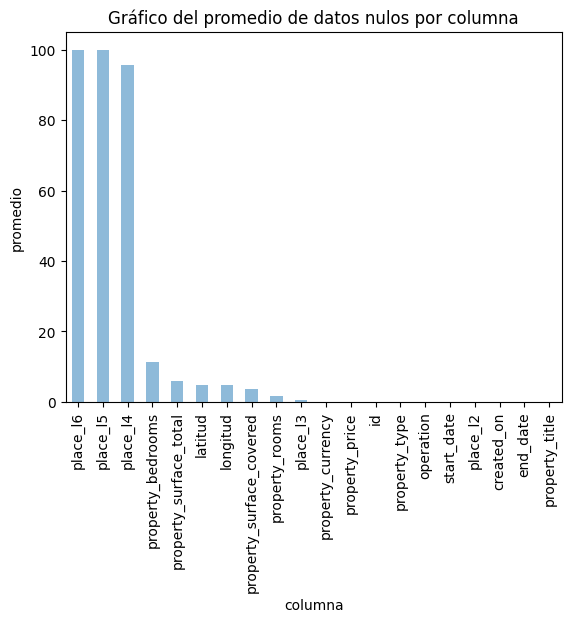

In [18]:
ds_porcentaje = promedio_datos_nulos
ds_porcentaje = ds_porcentaje.sort_values(ascending = False)
ds_porcentaje.plot.bar(alpha=0.5,title="Gráfico del promedio de datos nulos por columna", xlabel="columna" , ylabel="promedio")

Entonces los datos que debo analizar son:

In [19]:
promedio_datos_nulos.sort_values(ascending = False,inplace=True)
filtro = promedio_datos_nulos!=0
datos_nulos = promedio_datos_nulos[filtro]
datos_nulos

place_l6                    100.000000
place_l5                    100.000000
place_l4                     95.601852
property_bedrooms            11.381173
property_surface_total        5.787037
latitud                       4.783951
longitud                      4.783951
property_surface_covered      3.742284
property_rooms                1.658951
place_l3                      0.424383
dtype: float64

####Elimino places (place_l6, place_l5, place_l4)

Al ver el gráfico y el análisis previo de nulos. Puedo eliminar las columnas ```place_l6```, ```place_l5``` y ```place_l4```, pues tienen en su totalidad de datos nulos. El ```place_l4``` tiene casi su totalidad de nulos.

Consideramos que las columnas ```place_l6```, ```place_l5``` son datos faltantes de tipo MCAR

In [20]:
columnas = ['place_l6','place_l5','place_l4']
ds_train.drop(columns=columnas, inplace=True)
ds_test.drop(columns=columnas, inplace=True)

In [21]:
ds_train.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
5376,mdo6ljbqnIH8uSa3VCNb1g==,2021-10-29,2022-03-04,2021-10-29,-34.575797,-58.479800,Capital Federal,Villa Urquiza,Venta,PH,6.0,5.0,241.0,177.0,420000.0,USD,PH - Villa Urquiza
12358,tqnyOEZZnasgBlKMq6L0cw==,2021-07-06,2021-07-20,2021-07-06,-34.561454,-58.468603,Capital Federal,Belgrano,Venta,Departamento,4.0,3.0,78.0,75.0,129900.0,USD,Venta Belgrano C 4 AMBIENTES en Dúplex a es...
12147,/pXJpHDKUgu/t53HqTcfzQ==,2021-07-06,9999-12-31,2021-07-06,-34.592667,-58.409202,Capital Federal,Palermo,Venta,Departamento,2.0,1.0,56.0,49.0,149000.0,USD,EMPRENDIMIENTO 2 Amb c/balcon Apto Prof. (Pago...
2810,dXWZZkgsLMxc6Nvm2dskGw==,2021-12-17,2022-01-27,2021-12-17,-34.605603,-58.508732,Capital Federal,Villa Devoto,Venta,Departamento,2.0,1.0,47.0,45.0,79000.0,USD,Departamento - Villa Devoto
11254,hjX/7xp8YNeOPcENIzzx/w==,2021-01-13,2022-07-31,2021-01-13,-34.608208,-58.487425,Capital Federal,Villa del Parque,Venta,Departamento,2.0,1.0,46.0,42.0,125000.0,USD,"Semipiso 2 amb. a estrenar c/toilette, balcón ..."


In [22]:
ds_test.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
12836,Jd7VLIcNoPzcO6SKB6USSA==,2021-07-06,2021-09-20,2021-07-06,-34.582241,-58.497705,Capital Federal,Villa Pueyrredón,Venta,Departamento,1.0,NaN,42.0,38.0,95000.0,USD,Depto de 1 ambiente al frente.
6365,Cw7sqqNG2hLLXcevlxReBQ==,2021-10-29,2021-11-03,2021-10-29,-34.573416,-58.447945,Capital Federal,Colegiales,Venta,Departamento,3.0,2.0,81.0,67.0,182250.0,USD,DE POZO DEPTO 3AMB 2BAÑOS 6°PISO CUOTAS EN PES...
6609,XSJ1Ag9XZPQfhH1dzYb/jQ==,2021-02-09,2021-06-10,2021-02-09,-34.639161,-58.361130,Capital Federal,Boca,Venta,PH,8.0,4.0,244.0,200.0,330000.0,USD,EXCELENTE PH 8 AMB. CON DEPENDENCIA Y BALCON ...
13237,nyMtfCcYiiDempJN5XIFbw==,2021-03-01,2021-06-05,2021-03-01,-34.607182,-58.420296,Capital Federal,Almagro,Venta,Departamento,3.0,2.0,58.0,49.0,149000.0,USD,3 ambientes c/cochera refaccionado y super lum...
7934,akXWCafBdlb2/D6rdORFIw==,2021-02-09,2021-07-20,2021-02-09,-34.566851,-58.472237,Capital Federal,Villa Urquiza,Venta,Departamento,3.0,2.0,53.0,53.0,160000.0,USD,DPTO 3 AMBIENTES CON COCHERA FIJA CUBIERTA


####Latitud y longitud
Vamos a anlizar los nulos de estas dos variables

In [23]:
# establezco si son o no nulos
def ds_nulo(columnas):
  return ds_train[columnas].isna()

def filtro_nulo(columna,ds):
  return ds[columna]==True

def filtro_no_nulo(columna,ds):
  return ds[columna]==True

def aplico_filtro(ds,filtro,columna,nulidad):
  ds.loc[filtro,columna] = nulidad
  return ds

latatitud_longitud = ds_nulo(['latitud','longitud'])
# filtros latitud
v_filtro_latitud = filtro_nulo('latitud',latatitud_longitud)
f_filtro_latitud = filtro_no_nulo('latitud',latatitud_longitud)
# filtros longitud
v_filtro_longitud = filtro_nulo('longitud',latatitud_longitud)
f_filtro_longitud = filtro_no_nulo('longitud',latatitud_longitud)
# aplico los filtros
latatitud_longitud = aplico_filtro(latatitud_longitud,v_filtro_latitud,'latitud','nulo')
latatitud_longitud = aplico_filtro(latatitud_longitud,f_filtro_latitud,'latitud','no nulo')

latatitud_longitud = aplico_filtro(latatitud_longitud,v_filtro_longitud,'longitud','nulo')
latatitud_longitud = aplico_filtro(latatitud_longitud,f_filtro_longitud,'longitud','no nulo')

latatitud_longitud.head()


,latitud,longitud
5376,False,False
12358,False,False
12147,False,False
2810,False,False
11254,False,False


In [24]:
def conteo_ds(ds,columna):
  return ds[columna].value_counts()

def imprimir_cantidades(nulos,no_nulos,columna):
  print("Cantidad de datos NULOS en {}: {}".format(columna,nulos))
  print("Cantidad de datos NO NULOS en {}: {}".format(columna,no_nulos))

cant_nulos_latitud,cant_no_nulos_latitud = conteo_ds(latatitud_longitud,'latitud')
imprimir_cantidades(cant_nulos_latitud,cant_no_nulos_latitud,'latitud')


Cantidad de datos NULOS en latitud: 2468
Cantidad de datos NO NULOS en latitud: 124


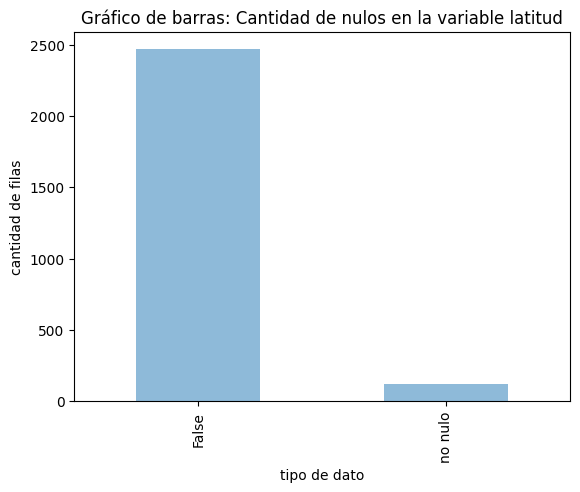

In [25]:
def generar_grafico(ds,columna):
  titulo = "Gráfico de barras: Cantidad de nulos en la variable " + columna
  ds[columna].value_counts().plot.bar(alpha=0.5,title=titulo, xlabel="tipo de dato" , ylabel="cantidad de filas")

generar_grafico(latatitud_longitud,'latitud')

In [26]:
cant_nulos_longitud,cant_no_nulos_longitud = conteo_ds(latatitud_longitud,'longitud')
imprimir_cantidades(cant_nulos_longitud,cant_no_nulos_longitud,'longitud')

Cantidad de datos NULOS en longitud: 2468
Cantidad de datos NO NULOS en longitud: 124


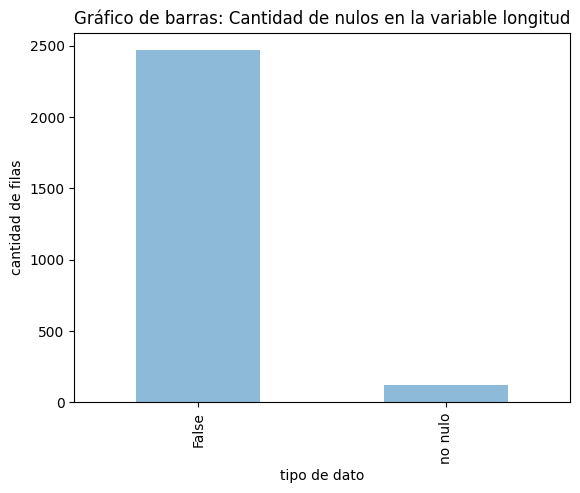

In [27]:
generar_grafico(latatitud_longitud,'longitud')

####Superficie total y Superficie cubierta (property_surface_total, property_surface_covered)

In [28]:
# establezco si son o no nulos
sup_total_cubierta = ds_nulo(['property_surface_total','property_surface_covered'])
# creo filtro si son o no nulos
v_filtro_total =  filtro_nulo('property_surface_total',sup_total_cubierta)
f_filtro_total =  filtro_no_nulo('property_surface_total',sup_total_cubierta)

v_filtro_cubierto =  filtro_nulo('property_surface_covered',sup_total_cubierta)
f_filtro_cubierto =  filtro_no_nulo('property_surface_covered',sup_total_cubierta)
# establezco los nulos y no nulos
sup_total_cubierta = aplico_filtro(sup_total_cubierta,v_filtro_total,'property_surface_total','nulo')
sup_total_cubierta = aplico_filtro(sup_total_cubierta,v_filtro_total,'property_surface_total','no nulo')

# establezco los nulos y no nulos
sup_total_cubierta = aplico_filtro(sup_total_cubierta,v_filtro_total,'property_surface_covered','nulo')
sup_total_cubierta = aplico_filtro(sup_total_cubierta,v_filtro_total,'property_surface_covered','no nulo')

sup_total_cubierta.head()

,property_surface_total,property_surface_covered
5376,False,False
12358,False,False
12147,False,False
2810,False,False
11254,False,False


In [29]:
cant_nulos_total, cant_no_nulos_total = conteo_ds(sup_total_cubierta,'property_surface_total')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_surface_total')

Cantidad de datos NULOS en property_surface_total: 2442
Cantidad de datos NO NULOS en property_surface_total: 150


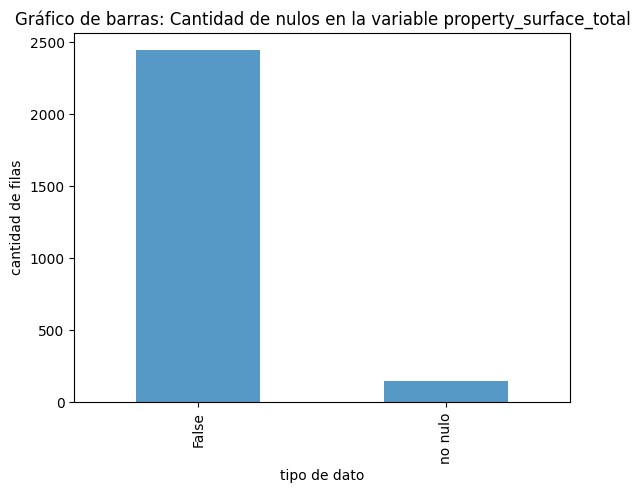

In [30]:
sup_total_cubierta['property_surface_total'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_surface_total", xlabel="tipo de dato" , ylabel="cantidad de filas")
generar_grafico(sup_total_cubierta,'property_surface_total')

In [31]:
conteo_cubierto = sup_total_cubierta['property_surface_covered'].value_counts()
cant_nulos_cubierto = conteo_cubierto[0]
cant_no_nulos_cubierto = conteo_cubierto[1]
print("Cantidad de datos NULOS en property_surface_covered: {}".format(cant_nulos_cubierto))
print("Cantidad de datos NO NULOS en property_surface_covered: {}".format(cant_no_nulos_cubierto))

Cantidad de datos NULOS en property_surface_covered: 2345
Cantidad de datos NO NULOS en property_surface_covered: 150


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_surface_covered'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

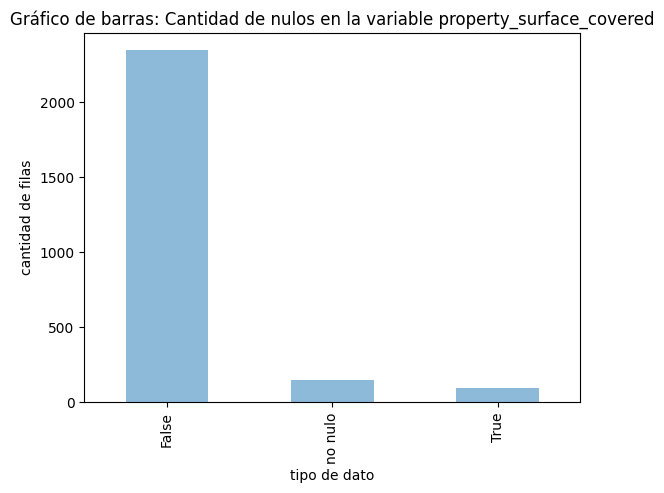

In [32]:
sup_total_cubierta['property_surface_covered'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_surface_covered", xlabel="tipo de dato" , ylabel="cantidad de filas")

####Habitaciones y dormitorios (property_rooms, property_bedrooms)

In [33]:
# establezco si son o no nulos
habitaciones_dormis = ds_train[['property_rooms','property_bedrooms']].isna()
# creo filtro si son o no nulos
v_filtro_hab =  habitaciones_dormis['property_rooms']==True
f_filtro_hab =  habitaciones_dormis['property_rooms']==False
v_filtro_dormis =  habitaciones_dormis['property_bedrooms']==True
f_filtro_dormis =  habitaciones_dormis['property_bedrooms']==False
# establezco los nulos y no nulos
habitaciones_dormis.loc[v_filtro_hab, 'property_rooms'] = 'nulo'
habitaciones_dormis.loc[f_filtro_hab, 'property_rooms'] = 'no nulo'

# establezco los nulos y no nulos
habitaciones_dormis.loc[v_filtro_dormis, 'property_bedrooms'] = 'nulo'
habitaciones_dormis.loc[f_filtro_dormis, 'property_bedrooms'] = 'no nulo'

habitaciones_dormis.head()

,property_rooms,property_bedrooms
5376,no nulo,no nulo
12358,no nulo,no nulo
12147,no nulo,no nulo
2810,no nulo,no nulo
11254,no nulo,no nulo


In [34]:
conteo_habitacion = habitaciones_dormis['property_rooms'].value_counts()
cant_nulos_habitacion = conteo_habitacion[0]
cant_no_nulos_habitacion = conteo_habitacion[1]
print("Cantidad de datos NULOS en property_rooms: {}".format(cant_nulos_habitacion))
print("Cantidad de datos NO NULOS en property_rooms: {}".format(cant_no_nulos_habitacion))

Cantidad de datos NULOS en property_rooms: 2549
Cantidad de datos NO NULOS en property_rooms: 43


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_rooms'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

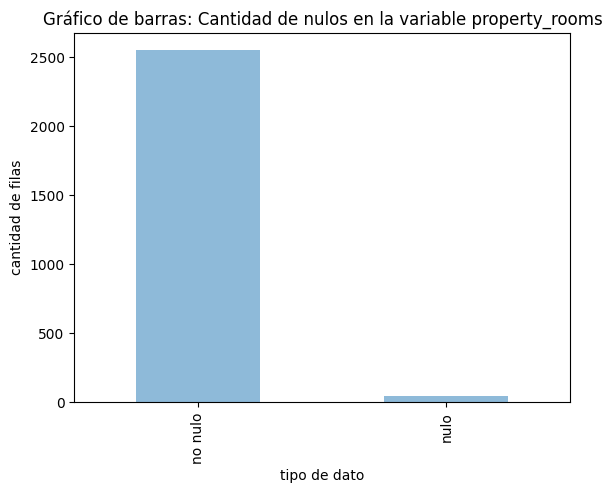

In [35]:
habitaciones_dormis['property_rooms'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_rooms", xlabel="tipo de dato" , ylabel="cantidad de filas")

In [36]:
conteo_dormis = habitaciones_dormis['property_bedrooms'].value_counts()
cant_nulos_dormis = conteo_dormis[0]
cant_no_nulos_dormis = conteo_dormis[1]
print("Cantidad de datos NULOS en property_bedrooms: {}".format(cant_nulos_dormis))
print("Cantidad de datos NO NULOS en property_bedrooms: {}".format(cant_no_nulos_dormis))

Cantidad de datos NULOS en property_bedrooms: 2297
Cantidad de datos NO NULOS en property_bedrooms: 295


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_bedrooms'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

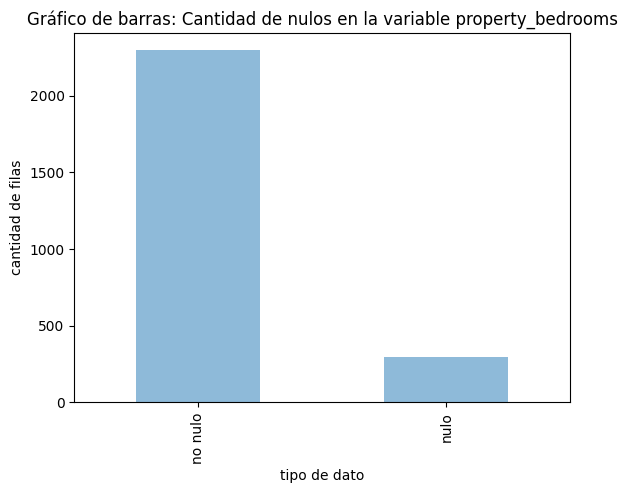

In [37]:
habitaciones_dormis['property_bedrooms'].value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_bedrooms", xlabel="tipo de dato" , ylabel="cantidad de filas")

####Barrio (place_l3)

In [38]:
# establezco si son o no nulos
barrio = ds_train['place_l3'].isna()
# creo filtro si son o no nulos
v_filtro_barrio =  barrio == True
f_filtro_barrio =  barrio == False
# establezco los nulos y no nulos
barrio.loc[v_filtro_barrio] = 'nulo'
barrio.loc[f_filtro_barrio] = 'no nulo'

barrio.head()

5376     no nulo
12358    no nulo
12147    no nulo
2810     no nulo
11254    no nulo
Name: place_l3, dtype: object

In [39]:
conteo_barrio = barrio.value_counts()
cant_nulos_barrio = conteo_barrio[0]
cant_no_nulos_barrio = conteo_barrio[1]
print("Cantidad de datos NULOS en place_l3: {}".format(cant_nulos_barrio))
print("Cantidad de datos NO NULOS en place_l3: {}".format(cant_no_nulos_barrio))

Cantidad de datos NULOS en place_l3: 2581
Cantidad de datos NO NULOS en place_l3: 11


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable place_l3'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

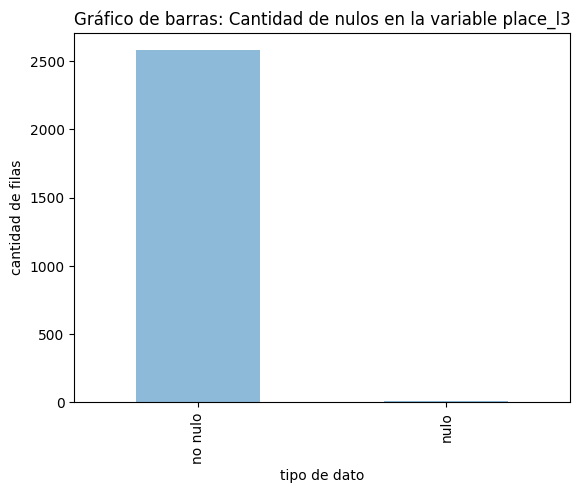

In [40]:
barrio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable place_l3", xlabel="tipo de dato" , ylabel="cantidad de filas")

####Precio

In [41]:
precio = ds_train['property_price'].isna()
# creo filtro si son o no nulos
v_filtro_precio =  precio == True
f_filtro_precio =  precio == False
# establezco los nulos y no nulos
precio.loc[v_filtro_precio] = 'nulo'
precio.loc[f_filtro_precio] = 'no nulo'

precio.head()

5376     no nulo
12358    no nulo
12147    no nulo
2810     no nulo
11254    no nulo
Name: property_price, dtype: object

In [42]:
print("Cantidad de datos NO NULOS en property_price: {}".format(precio.value_counts()))

Cantidad de datos NO NULOS en property_price: no nulo    2592
Name: property_price, dtype: int64


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_price'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

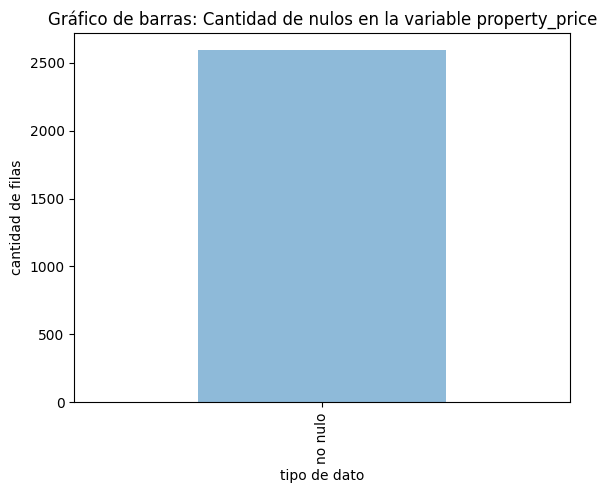

In [43]:
precio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_price", xlabel="tipo de dato" , ylabel="cantidad de filas")

###Análisis de datos faltantes a nivel fila

Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos
faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de
faltantes por fila en el dataset.


In [44]:
# Calcular la cantidad de filas nulas
cantidad_filas_nulas = ds_train.isna().sum(axis=1)
filtro = cantidad_filas_nulas > 0
cantidad_filas_nulas = cantidad_filas_nulas[filtro]
print("La cantidad de filas que tienen al menos un dato nulo es: ",len(cantidad_filas_nulas))

La cantidad de filas que tienen al menos un dato nulo es:  628


<Axes: title={'center': 'Gráfico de barras: Cantidad de filas nulas en ds_train'}, xlabel='cantidad de nulos', ylabel='cantidad de filas'>

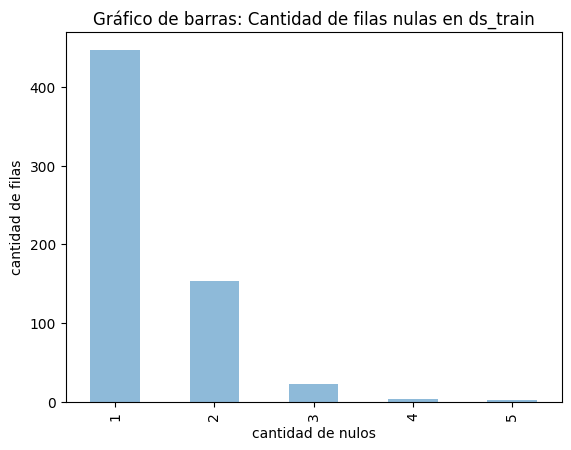

In [45]:
cantidad_filas_nulas.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de filas nulas en ds_train", xlabel="cantidad de nulos" , ylabel="cantidad de filas")

###Revisión de datos faltantes o mal ingresados

Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de
valores, eliminación de registros incompletos, etc.


Recordemos los datos nulos que tenemos en ds_train

In [46]:
datos_nulos

place_l6                    100.000000
place_l5                    100.000000
place_l4                     95.601852
property_bedrooms            11.381173
property_surface_total        5.787037
latitud                       4.783951
longitud                      4.783951
property_surface_covered      3.742284
property_rooms                1.658951
place_l3                      0.424383
dtype: float64

Como eliminamos las columnas ```place_l6```, ```place_l5``` y ```place_l4``` las descartamos de esta revisión.


Entonces debemos revisar los siguientes datos:
*     property_bedrooms
*     property_rooms
*     longitud
*     latitud
*     place_l3
*     property_surface_total
*     property_surface_covered

Veremos unas de las estrategias para para trabajar con datos faltantes. Procederemos a imputar datos

####Imputación Cold Deck
Vamos a trabajar con los datos ```latitud``` y ```longitud``` para completar la variable ```place_l3```.
Para ello vamos a utilizar el csv ```barrios.csv``` provisto por [GCBA](https://data.buenosaires.gob.ar/dataset/barrios/resource/juqdkmgo-191-resource) que nos da la localización y límites geográficos de los barrios de la Ciudad.

Para ello vamos a usar ```Geopandas``` correspondiente a la [documentación](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html)
[wkt](https://shapely.readthedocs.io/en/stable/manual.html)

In [60]:
from shapely import wkt
from shapely.geometry import MultiPolygon, Polygon, Point

ds_barrios = pd.read_csv('/content/barrios.csv', header=0,sep=';')
def completar_barrios(ds):
  for index, propiedad in ds.iterrows():
    if isinstance(propiedad["place_l3"], str):
      continue

    for index,barrio in ds_barrios.iterrows():
      barrio_aux = barrio['BARRIO']
      if barrio_aux == '' or barrio_aux is None:
        continue
      coordenada = Point(propiedad['longitud'],propiedad['latitud'])
      # uso wkt Para deserializar una cadena y obtener un nuevo objeto geométrico del tipo apropiado
      # uso covers para ver si está cubierta la coordenada de ds_barrios por lo que tiene mi ds
      if wkt.loads(barrio['WKT']).covers(coordenada):
        ds.loc[index,'place_l3'] = barrio_aux

  return

completar_barrios(ds_train)
completar_barrios(ds_test)

Visualizamos el dataset para ver si podemos ver algún nulo rápido.

In [75]:
# Ordenar el DataFrame por 'place_l3'
ds_train_sorted = ds_train.sort_values(by='place_l3')

# Extraer la columna 'place_l3'
place_l3_column = ds_train_sorted['place_l3']

# Elimino la columna 'place_l3' del DataFrame
ds_train_sorted.drop(columns=['place_l3'], inplace=True)

# Inserto la columna 'place_l3' en la primera posición
ds_train_sorted.insert(0, 'place_l3', place_l3_column)

# Ahora ds_train_sorted tiene 'place_l3' como la primera columna
# para visualizarlo mejor
ds_train_sorted

,place_l3,id,start_date,end_date,created_on,latitud,longitud,place_l2,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
10828,Abasto,YKzg1u4r+ap3eQkx5Tk7pQ==,2021-01-13,2021-09-14,2021-01-13,-34.601931,-58.411260,Capital Federal,Venta,Departamento,1.0,1.0,18.0,NaN,38000.0,USD,Departamento - Abasto
3543,Abasto,hVfu4tcXGlD/NxAR9zNN3w==,2021-02-20,2021-02-27,2021-02-20,-34.602871,-58.412632,Capital Federal,Venta,Departamento,1.0,NaN,33.0,28.0,72000.0,USD,Departamento en venta 1 ambiente Abasto con Ba...
12058,Abasto,cMvo4GsnT1JH9LySukznpA==,2021-07-06,9999-12-31,2021-07-06,-34.603890,-58.410998,Capital Federal,Venta,Departamento,2.0,1.0,26.0,26.0,75000.0,USD,Duplex 2 ambientes interno.
905,Agronomía,Pzsb4G2+q+Xd0mYQHHXdVQ==,2021-09-09,2022-01-27,2021-09-09,-34.597424,-58.492490,Capital Federal,Venta,Departamento,5.0,3.0,205.0,195.0,395000.0,USD,Departamento - Agronomia
10018,Agronomía,vTI4VgHK0008He36RiJPMQ==,2021-05-18,2021-06-05,2021-05-18,-34.593435,-58.476566,Capital Federal,Venta,Departamento,1.0,NaN,41.0,36.0,95500.0,USD,Departamento - Agronomia- 2 amb. con Balcón. V...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,Villa del Parque,pywEBPsJ41BwTHcMjumgtw==,2021-10-29,2022-01-27,2021-10-29,-34.603877,-58.493163,Capital Federal,Venta,Departamento,3.0,2.0,64.0,46.0,143000.0,USD,Departamento - Villa del Parque
8271,Villa del Parque,kYdDTHJqrtJ2H4qE/8r+WA==,2021-05-18,2021-06-05,2021-05-18,-34.603453,-58.495281,Capital Federal,Venta,PH,4.0,3.0,80.0,66.0,110000.0,USD,PH - Villa del Parque
11256,Villa del Parque,fEXtT/nkkOE9Sw4LnBG5Tg==,2021-01-13,9999-12-31,2021-01-13,-34.604653,-58.495169,Capital Federal,Venta,Departamento,1.0,NaN,48.0,30.0,99000.0,USD,ALQUILER TEMPORARIO MONOAMBIENTE EN VILLA DEL ...
1367,Villa del Parque,W10nk1JRk6x0OuABpHK+GQ==,2021-09-09,2021-09-19,2021-09-09,-34.599598,-58.493924,Capital Federal,Venta,Departamento,3.0,2.0,91.0,71.0,290000.0,USD,Venta Departamento 3 amb Villa del Parque Balcón


Vemos que hay datos NaN en el barrio

In [63]:
ds_train['place_l3'].isna().value_counts()

False    2583
True       11
Name: place_l3, dtype: int64

Estos datos en NaN pueden ser datos mal ingresados. Se ingresó mal la coordenada de la propiedad y se la clasificó como Capital Federal. Lo mismo puede suceder de que no tengan latitud ni longitud. Procedo a eliminar dichos datos

In [71]:
columnas_a_eliminar = ['latitud','longitud','place_l3']
ds_train = ds_train.dropna(subset=columnas_a_eliminar)
ds_test =  ds_test.dropna(subset=columnas_a_eliminar)

Verifico mis ```datos_nulos``` en mi dataset

In [72]:
promedio_datos_nulos = ds_train.isna().sum() / filas * 100
promedio_datos_nulos.sort_values(ascending = False,inplace=True)
filtro = promedio_datos_nulos!=0
datos_nulos = promedio_datos_nulos[filtro]
datos_nulos

property_bedrooms           10.725309
property_surface_total       5.362654
property_surface_covered     3.626543
property_rooms               1.543210
dtype: float64

####Análisis de property's
Ahora vamos a seguir con el análisis de las siguientes variables:
*     property_bedrooms
*     property_rooms
*     property_surface_total
*     property_surface_covered

Podemos identificar que estas variables son tipos de datos faltantes MAR.

###Comparación de distribuciones
En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con
la distribución anterior a la imputación de los datos faltantes.


##Valores atípicos

# Resolución Roy de filtrado

In [ ]:
# SELECCIONAMOS LAS COLUMNAS QUE VAMOS A UTILIZAR(SON LAS QUE MAS NOS SIRVEN PARA ENCONTRAR LOS DATOS QUE BUSCAMOS)
dfFiltrado =df[["place_l2","place_l3","property_type","property_currency","operation","property_title"]]
dfFiltrado

,place_l2,place_l3,property_type,property_currency,operation,property_title
0,Neuquén,NaN,Casa,NaN,Venta,Casa - Capital
1,Montevideo,NaN,Casa,USD,Venta,Casa - Malvín
2,Entre Ríos,NaN,Casa,USD,Venta,Casa - Uruguay
3,Maldonado,NaN,Casa,USD,Venta,Casa - El Chorro
4,Neuquén,NaN,PH,USD,Venta,PH - Villa Farrell
...,...,...,...,...,...,...
460149,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,Local comercial,USD,Venta,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,Bs.As. G.B.A. Zona Norte,General San Martín,Local comercial,USD,Venta,Nave Industrial - Villa Lynch
460151,Bs.As. G.B.A. Zona Norte,General San Martín,Local comercial,USD,Venta,importante edificio comercial en tres plantas ...
460152,Santa Fe,Villa Constitución,Local comercial,NaN,Alquiler,Local - Villa Constitucion


In [ ]:
# Filtramos las filas en las que el valor de la columna "property_currency" no sea igual a -1.
dfFiltrado["property_currency"] = dfFiltrado["property_currency"].fillna(-1)
dfFiltrado = dfFiltrado[dfFiltrado["property_currency"] != -1]

# Filtramos las filas en las que el valor de la columna "property_currency" no sea igual a -1.
dfFiltrado["operation"] = dfFiltrado["operation"].fillna(-1)
dfFiltrado = dfFiltrado[dfFiltrado["operation"] != -1]

# Filtramos las filas en las que el valor de la columna "property_type" no sea igual a -1.
dfFiltrado["property_type"] = dfFiltrado["property_type"].fillna(-1)
dfFiltrado = dfFiltrado[dfFiltrado["property_type"] != -1]

# Filtramos las filas en las que el valor de la columna "place_l2" no sea igual a -1.
dfFiltrado["place_l2"] = dfFiltrado["place_l2"].fillna(-1)
dfFiltrado = dfFiltrado[dfFiltrado["place_l2"] != -1]

#Basicamente lo que hice fue filtrar por todos los NaN que si son datos necesarios
dfFiltrado

,place_l2,place_l3,property_type,property_currency,operation,property_title
25,Capital Federal,NaN,Casa,USD,Venta,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,Capital Federal,Boca,Departamento,USD,Venta,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,Capital Federal,Boca,Departamento,USD,Venta,Departamento - 4 Ambientes - Catalinas Sur
49,Capital Federal,Once,Departamento,USD,Venta,Venta departamento 4 ambientes Once
51,Capital Federal,Boedo,PH,USD,Venta,PH - Boedo
...,...,...,...,...,...,...
460072,Capital Federal,Villa del Parque,Departamento,USD,Venta,Espectacular 4 amb130m2 con Balcon Terraza!!!
460073,Capital Federal,Villa del Parque,Departamento,USD,Venta,3 ambientes con cochera listo para habitar!
460074,Capital Federal,Villa del Parque,Departamento,USD,Venta,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
460075,Capital Federal,Villa del Parque,Departamento,USD,Venta,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


In [ ]:
dfFiltrado = dfFiltrado[dfFiltrado['property_currency'] == 'USD']
dfFiltrado = dfFiltrado[dfFiltrado['operation'] == 'Venta']
dfFiltrado = dfFiltrado[dfFiltrado['place_l2'] == 'Capital Federal']
valores_a_mantener = ['Casa', 'PH', 'Departamento']
dfFiltrado = dfFiltrado[dfFiltrado['property_type'].isin(valores_a_mantener)]
#Filtre por los valores que pide el enunciado USD, VENTA, CASA,PH, DEPARTAMENTO, CABA.
dfFiltrado

,place_l2,place_l3,property_type,property_currency,operation,property_title
25,Capital Federal,NaN,Casa,USD,Venta,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,Capital Federal,Boca,Departamento,USD,Venta,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,Capital Federal,Boca,Departamento,USD,Venta,Departamento - 4 Ambientes - Catalinas Sur
49,Capital Federal,Once,Departamento,USD,Venta,Venta departamento 4 ambientes Once
51,Capital Federal,Boedo,PH,USD,Venta,PH - Boedo
...,...,...,...,...,...,...
460072,Capital Federal,Villa del Parque,Departamento,USD,Venta,Espectacular 4 amb130m2 con Balcon Terraza!!!
460073,Capital Federal,Villa del Parque,Departamento,USD,Venta,3 ambientes con cochera listo para habitar!
460074,Capital Federal,Villa del Parque,Departamento,USD,Venta,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
460075,Capital Federal,Villa del Parque,Departamento,USD,Venta,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


Text(0, 0.5, 'Tipo de Propiedad')

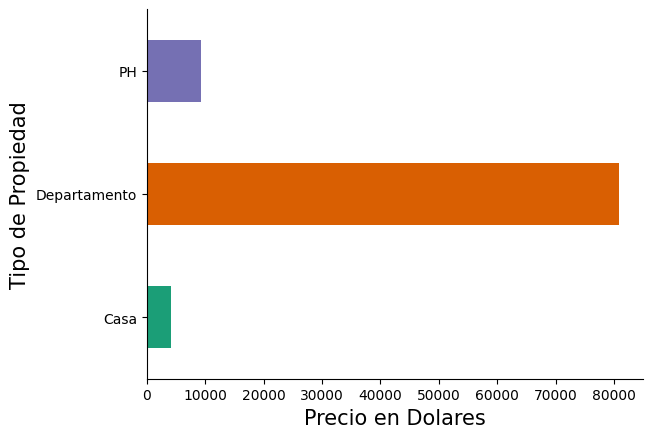

In [ ]:
# @title property_type
dfFiltrado.groupby('property_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Precio en Dolares", fontsize=15)
plt.ylabel("Tipo de Propiedad", fontsize=15)

owo